<a href="https://colab.research.google.com/github/Mikhailo88/ChiselniMetody/blob/main/%D0%9B%D1%8013_%D0%9E%D0%BB%D1%8C%D1%85%D0%BE%D0%B2%D0%B5%D0%BD%D0%BA%D0%BE_%D0%A4%D0%86%D0%A2_2_8_%D0%B2%D0%B0%D1%8021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

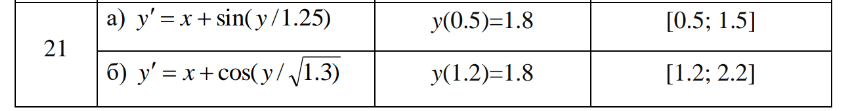

# а) Метод Ейлера

x = [0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5] 
y = [1.8    1.9491 2.1091 2.2785 2.4553 2.6377 2.8235 3.0107 3.1976 3.3827
 3.5649]


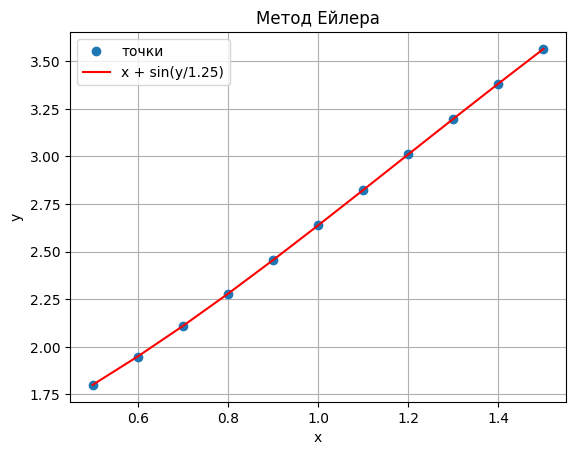

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x + np.sin(y/1.25)

# Вводимо параметри (ліва, права межі відрізку, крок, початкова умова)
a, b, h, y0 = 0.5, 1.5, 0.1, 1.8

# Перевірка вхідних параметрів
if h <= 0:
    print("Крок h повинен бути позитивним.")
    exit()
if a >= b:
    print("Права межа b повинна бути більшою за ліву межу a.")
    exit()

n = int((b - a) / h) # кількість кроків

x = np.array([a + i*h for i in range(n + 1)]) # задаємо x генератором списків

y = np.empty(n + 1)
y[0] = y0

for i in range(n):
    y[i + 1] = y[i] + f(x[i], y[i]) * h

y_rounded = np.round_(y, 4)
print("x =", x, "\ny =", y_rounded)

plt.plot(x, y, "o", x, y, "red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод Ейлера")
plt.legend(["точки", "x + sin(y/1.25)"])
plt.grid()
plt.show()

#Розв’язок диф. Рівняння за допомогою scipy.integrate import odeint

x= [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
y= [1.8        1.90456901 2.01953363 2.14405068 2.27706781 2.41735634
 2.56356325 2.7142777  2.86810471 3.02373698]


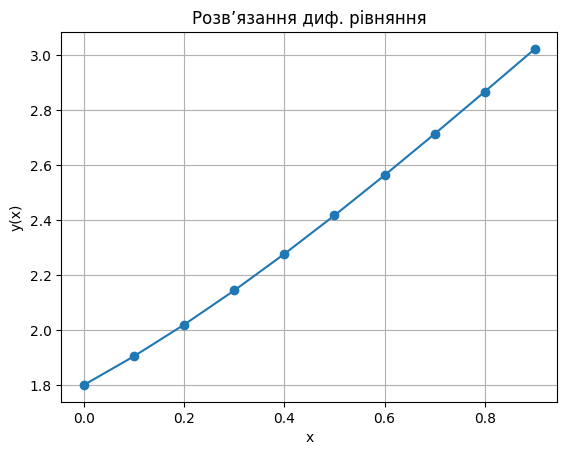

In [10]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(y, x):
    return x + np.sin(y/1.25)

# Початкова умова
y0 = 1.8

# Значення x
x = np.array([i * 0.1 for i in range(0, 10)])

# Розв'язання ODE
y = odeint(model, y0, x)

# Виведення результатів
print('x=', x)
print('y=', y.flatten())  # Перетворення в одновимірний масив для виводу

# Побудова графіка результатів
plt.plot(x, y, marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння')
plt.grid()
plt.show()

#Використання scipy.integrate.solve_ivp

x= [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
y= [1.8        1.91684305 2.04655335 2.1877891  2.33883955 2.49797375
 2.66344059 2.83346878 3.00626685 3.18002317]


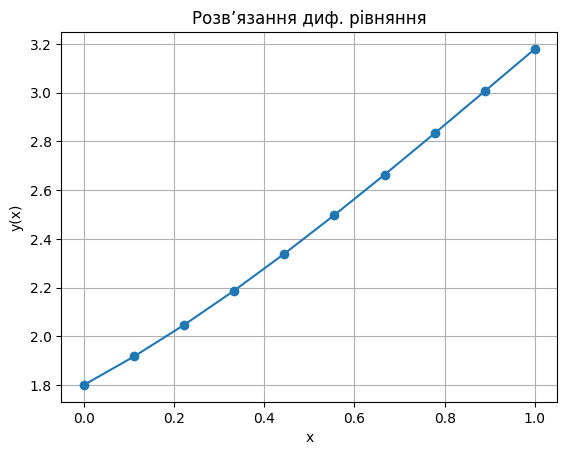

In [11]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(x, y):
    return x + np.sin(y/1.25)

# Початкова умова
y0 = [1.8]  # Потрібно передати як список

# Значення x
x = np.linspace(0, 1, 10)

# Розв'язання ODE
sol = solve_ivp(model, [0, 1], y0, t_eval=x)

# Виведення результатів
print('x=', sol.t)
print('y=', sol.y[0])

# Побудова графіка результатів
plt.plot(sol.t, sol.y[0], marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння')
plt.grid()
plt.show()


#а) Метод Ейлера-Коші

x = [1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3]
y = [1.80000000e+000 1.91900000e+000 2.03770000e+000 2.15620000e+000
 2.27490000e+000 2.39400000e+000 2.51420000e+000 2.63590000e+000
 2.75960000e+000 2.88610000e+000 3.01620000e+000 1.55535091e+161]


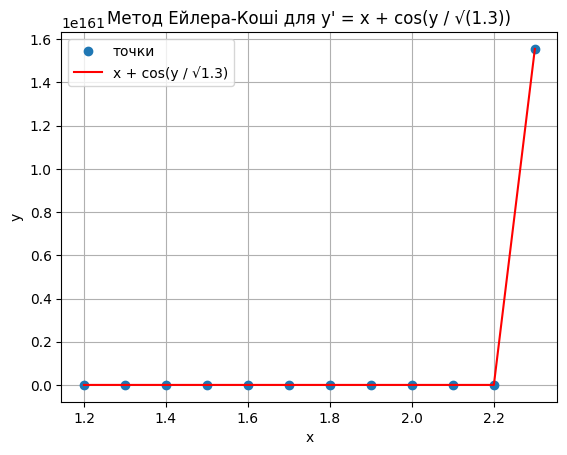

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x + np.cos(y / np.sqrt(1.3))

a = 1.2  # ліва межа відрізку
b = 2.2  # права межа відрізку
h = 0.1  # крок
y0 = 1.8  # початкова умова
n = int((b - a) / h)  # кількість кроків

# Генерація x із включенням останнього значення
x = np.arange(a, b + h, h)

# Генеруємо масив y з відповідною кількістю точок
y = np.empty(len(x))
y[0] = y0

# Метод Ейлера-Коші
for i in range(n):
    # Використовується середнє значення для нахилу
    k1 = f(x[i], y[i])
    k2 = f(x[i + 1], y[i] + h * k1)
    y[i + 1] = y[i] + (k1 + k2) * h / 2

y_rounded = np.round_(y, 4)

print("x =", x)
print("y =", y_rounded)

# Візуалізація
plt.plot(x, y, "o", x, y, "red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод Ейлера-Коші для y' = x + cos(y / √(1.3))")
plt.legend(["точки", "x + cos(y / √1.3)"])
plt.grid()
plt.show()




x= [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
y= [1.8        1.8040999  1.81742957 1.83921448 1.86874634 1.90537947
 1.94852832 1.99766639 2.05232583 2.112098  ]


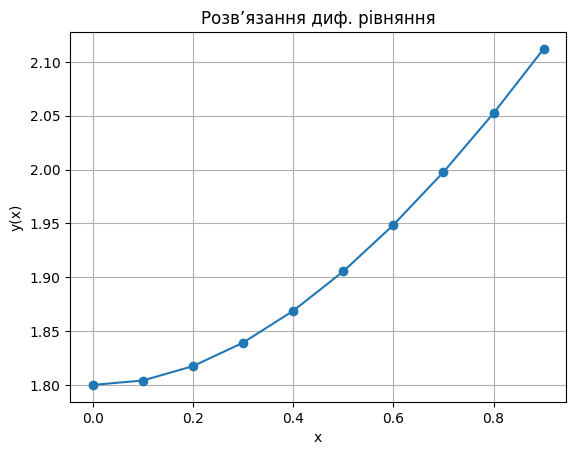

In [46]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(y, x):
    return x + np.cos(y / np.sqrt(1.3))

# Початкова умова
y0 = 1.8

# Значення x
x = np.array([i * 0.1 for i in range(0, 10)])

# Розв'язання ODE
y = odeint(model, y0, x)

# Виведення результатів
print('x=', x)
print('y=', y.flatten())  # Перетворення в одновимірний масив для виводу

# Побудова графіка результатів
plt.plot(x, y, marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння')
plt.grid()
plt.show()


x= [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
y= [1.8        1.80513991 1.82154697 1.84817229 1.88408669 1.92844701
 1.9804961  2.03956281 2.10506203 2.17649463]


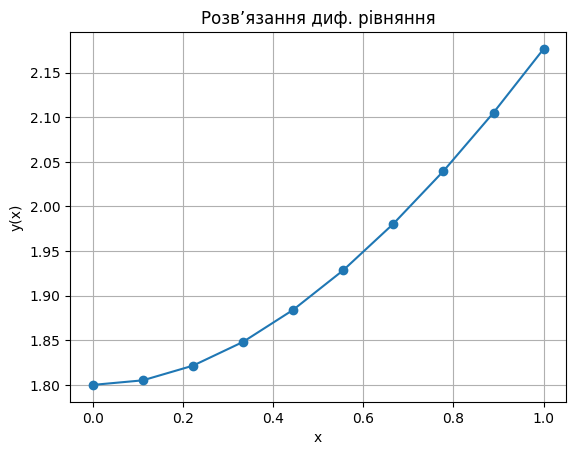

In [42]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(x, y):
    return x + np.cos(y / np.sqrt(1.3))

# Початкова умова
y0 = [1.8]  # Потрібно передати як список

# Значення x
x = np.linspace(0, 1, 10)

# Розв'язання ODE
sol = solve_ivp(model, [0, 1], y0, t_eval=x)

# Виведення результатів
print('x=', sol.t)
print('y=', sol.y[0])

# Побудова графіка результатів
plt.plot(sol.t, sol.y[0], marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння')
plt.grid()
plt.show()